# Analyse de la pollution en Occitanie
http://data-atmo-occitanie.opendata.arcgis.com/datasets/047b4d01a64943cb8a648aaf9b58307b_0

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

<a id="sommaire"> </a>
## Sommaire

*  __[Import](#import)__ <br>
*  __[Améliorations visuelles](#style)__ <br>
*  __[Visualisations classiques](#visu)__ <br>

<a id="import"> </a>
##  Imports

In [1]:
import os
import sys
# utile pour avoir un affichage identique dans divers notebook
sys.path.append("./codes")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 25})  # 

# commande "magique" pour améliorer la visualiation
%matplotlib notebook
# %matplotlib inline

<a id="style"> </a>

# Visualisation de données, seaborn et pandas

In [2]:
import seaborn as sns
import pandas as pd
from pathlib import Path

directory = Path.cwd()  # .parent
directory = directory.joinpath('prebuiltimages')
def my_saving_display(fig, directory, image_name, imageformat="pdf",
                      saving=False):
    """"Saving with personal function."""
    if saving is True:
        fig.savefig(directory.joinpath(image_name + '.' + imageformat),
                    format=imageformat)

In [3]:
from download import download
url = "http://josephsalmon.eu/enseignement/datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
path_target = "datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv'

In [4]:
df_pol_occ = pd.read_csv(path_target)
df_pol_occ.head(100)

,X,Y,id,nom_dep,nom_com,code_insee,nom_station,code_station,typologie,influence,...,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,x_wgs84,y_wgs84,geom,FID
0,1.41861,43.5756,12001,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-15T01:00:00.000Z,2017-12-16T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12001
1,1.41861,43.5756,12002,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-16T01:00:00.000Z,2017-12-17T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12002
2,1.41861,43.5756,12003,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-17T01:00:00.000Z,2017-12-18T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12003
3,1.41861,43.5756,12004,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-18T01:00:00.000Z,2017-12-19T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12004
4,1.41861,43.5756,12005,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-19T01:00:00.000Z,2017-12-20T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12005
5,1.41861,43.5756,12006,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-20T01:00:00.000Z,2017-12-21T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12006
6,1.41861,43.5756,12007,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-21T01:00:00.000Z,2017-12-22T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12007
7,1.41861,43.5756,12008,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-22T01:00:00.000Z,2017-12-23T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12008
8,1.41861,43.5756,12009,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-23T01:00:00.000Z,2017-12-24T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12009
9,1.41861,43.5756,12010,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,journaliere,2017-12-24T01:00:00.000Z,2017-12-25T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12010


In [5]:
df_pol_occ['polluant'].unique()


array(['O3', 'PM10', 'NO', 'NO2', 'SO2', 'PM2.5', 'NOX as NO2', 'H2S',
       'C6H6'], dtype=object)

In [6]:
villes_all = df_pol_occ['nom_com'].unique()
villes_all

array(['TOULOUSE', 'GAUDONVILLE', 'BESSIERES', 'TARBES',
       'SAINT-LAURENT-DES-ARBRES', 'NIMES', 'LA CALMETTE', 'PERPIGNAN',
       'MONTPELLIER', 'MILLAU', 'CASTRES', 'SAINT-GELY-DU-FESC',
       'LUNEL-VIEL', 'LOURDES', 'BLAGNAC', 'LATTES', 'AGDE',
       'SAINT-ESTEVE', 'ALBI', 'MIRAMONT-DE-COMMINGES', 'PAMIERS',
       'PEYRUSSE-VIEILLE', 'MONTGISCARD', 'BELESTA-EN-LAURAGAIS',
       'SAINT-GAUDENS', 'CORNEILHAN', 'FRAISSE-SUR-AGOUT', 'SAZE',
       'RODEZ', 'CAHORS', 'SAINT-PRIVAT-DES-VIEUX'], dtype=object)

In [7]:
nb_samples = df_pol_occ.count()[0]
print(nb_samples)

20808


In [8]:
df_pol_occ['day'] = pd.to_datetime(df_pol_occ['date_debut'])

In [9]:
# ville = 'TOULOUSE'
ville = 'MONTPELLIER'

df_pol_ville =df_pol_occ[df_pol_occ['nom_com']==ville]
df_pol_ville['polluant'].head()

1948    O3
1949    O3
1950    O3
1951    O3
1952    O3
Name: polluant, dtype: object

In [10]:
df_pol_ville['jour'] = pd.to_datetime(df_pol_ville['date_debut'])
df_pol_ville = df_pol_ville.set_index('jour')

/home/jo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


['X', 'Y', 'id', 'nom_dep', 'nom_com', 'code_insee', 'nom_station',
       'code_station', 'typologie', 'influence', 'polluant', 'id_poll_ue',
       'valeur_originale', 'code_unite_concentration', 'metrique',
       'date_debut', 'date_fin', 'statut_valid', 'x_l93', 'y_l93', 'x_wgs84',
       'y_wgs84', 'geom', 'FID']

In [11]:
df_pol_ville = df_pol_ville[['polluant','valeur_originale']]
df_pol_ville.head()

,polluant,valeur_originale
jour,,
2017-10-18 01:00:00,O3,70.880554
2017-10-19 01:00:00,O3,69.161110
2017-10-20 01:00:00,O3,61.621876
2017-10-21 01:00:00,O3,58.338543
2017-10-22 01:00:00,O3,70.778130


<IPython.core.display.Javascript object>


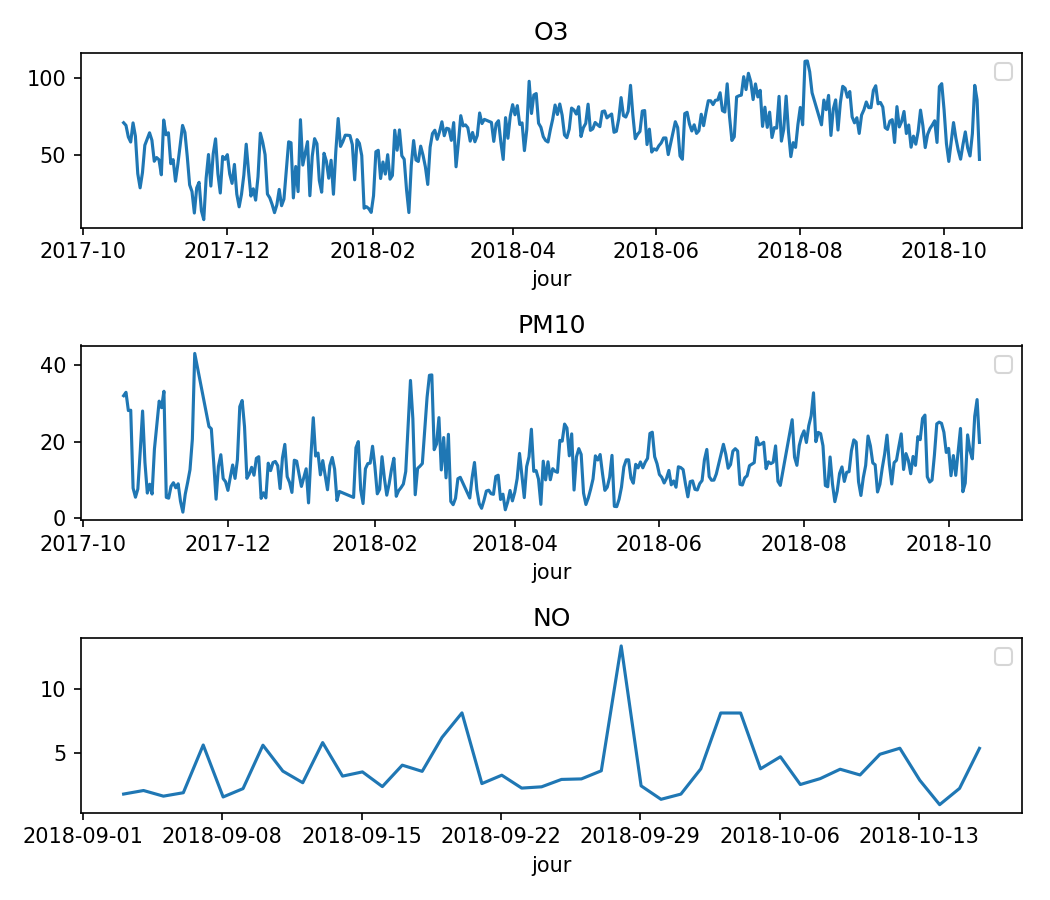

In [12]:
pol_names = df_pol_occ['polluant'].unique().tolist()
nb_poluant = len(pol_names)
df_pol_ville_p_polluant = []

fig, axes = plt.subplots(3, 1, figsize=(7, 6))
for i, pol_name in enumerate(pol_names[0:3]):
    temp = df_pol_ville[df_pol_ville['polluant'] == pol_name]
    temp = temp.drop(columns='polluant')
    df_pol_ville_p_polluant.append(temp)
    nb_observed = temp.count()[0]
    if nb_observed > 0:
        sns.lineplot(data=temp,ax=axes[i],ci=None)
        axes[i].legend([])
        axes[i].set_title(pol_name)

plt.tight_layout()
plt.show()

In [13]:
df_pol_ville_p_polluant[i]

,valeur_originale
jour,
2018-09-14 01:00:00,5.328125
2018-09-14 01:00:00,0.948958
2018-09-15 01:00:00,6.200000
2018-09-15 01:00:00,0.743750
2018-09-16 01:00:00,3.857609
2018-09-16 01:00:00,0.761458
2018-09-17 01:00:00,6.460417
2018-09-18 01:00:00,5.840351
2018-09-17 01:00:00,1.548958


In [14]:
df_pol_ville[df_pol_ville['polluant']=='O3']

,polluant,valeur_originale
jour,,
2017-10-18 01:00:00,O3,70.880554
2017-10-19 01:00:00,O3,69.161110
2017-10-20 01:00:00,O3,61.621876
2017-10-21 01:00:00,O3,58.338543
2017-10-22 01:00:00,O3,70.778130
2017-10-23 01:00:00,O3,62.146427
2017-10-24 01:00:00,O3,37.774639
2017-10-25 01:00:00,O3,28.533333
2017-10-26 01:00:00,O3,38.495651


In [15]:
pol_names, nb_poluant

(['O3', 'PM10', 'NO', 'NO2', 'SO2', 'PM2.5', 'NOX as NO2', 'H2S', 'C6H6'], 9)

In [16]:
df_pol_occ.columns

Index(['X', 'Y', 'id', 'nom_dep', 'nom_com', 'code_insee', 'nom_station',
       'code_station', 'typologie', 'influence', 'polluant', 'id_poll_ue',
       'valeur_originale', 'code_unite_concentration', 'metrique',
       'date_debut', 'date_fin', 'statut_valid', 'x_l93', 'y_l93', 'x_wgs84',
       'y_wgs84', 'geom', 'FID', 'day'],
      dtype='object')

In [17]:
# Keep only what is needed:
df_pol_occ = df_pol_occ[['valeur_originale', 'day', 'polluant','nom_com']]

<IPython.core.display.Javascript object>


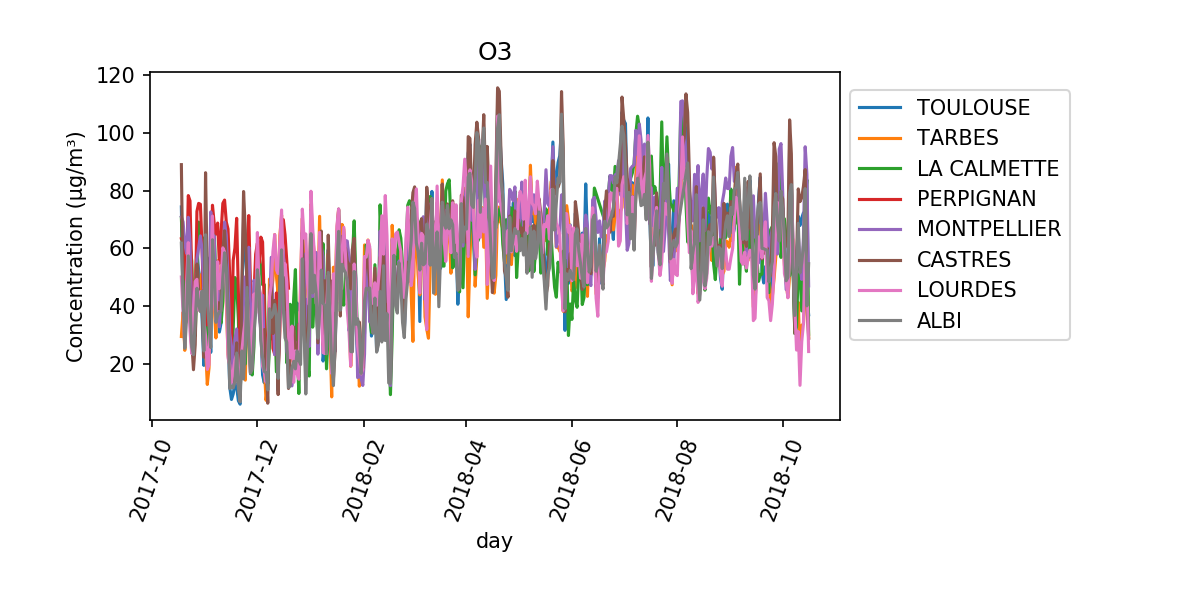

1081
TOULOUSE: 58.74
362
TARBES: 55.45
342
LA CALMETTE: 56.98
63
PERPIGNAN: 51.61
357
MONTPELLIER: 61.56
364
CASTRES: 60.01
364
LOURDES: 56.20
356
ALBI: 54.77


<IPython.core.display.Javascript object>


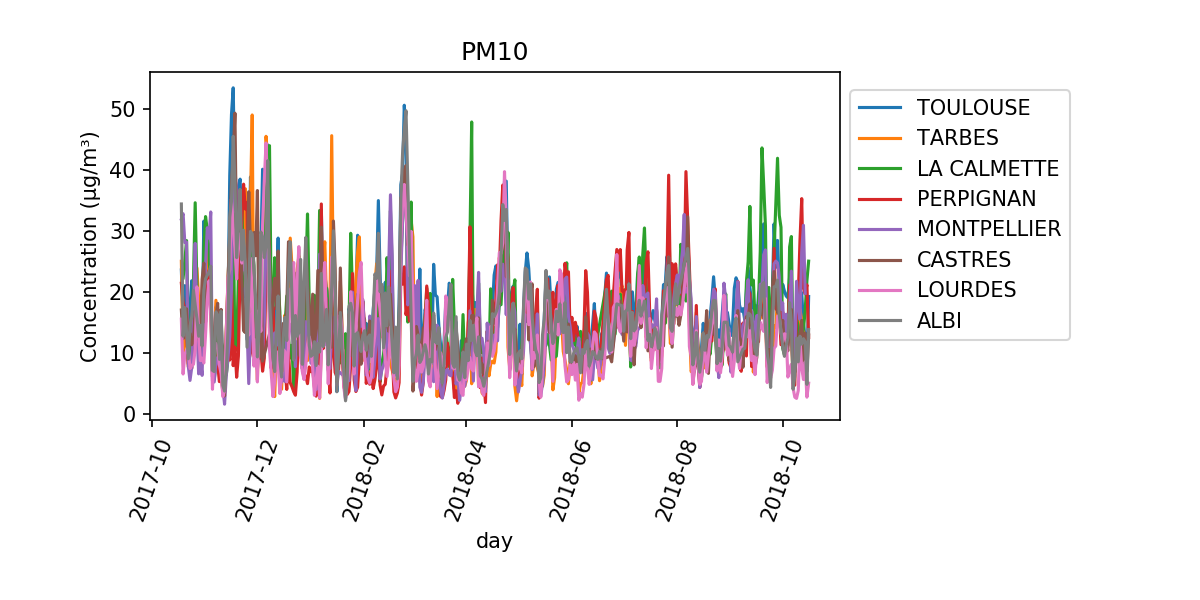

2487
TOULOUSE: 17.79
343
TARBES: 14.25
353
LA CALMETTE: 15.95
414
PERPIGNAN: 13.78
340
MONTPELLIER: 14.10
353
CASTRES: 14.89
353
LOURDES: 12.70
353
ALBI: 15.05


<IPython.core.display.Javascript object>


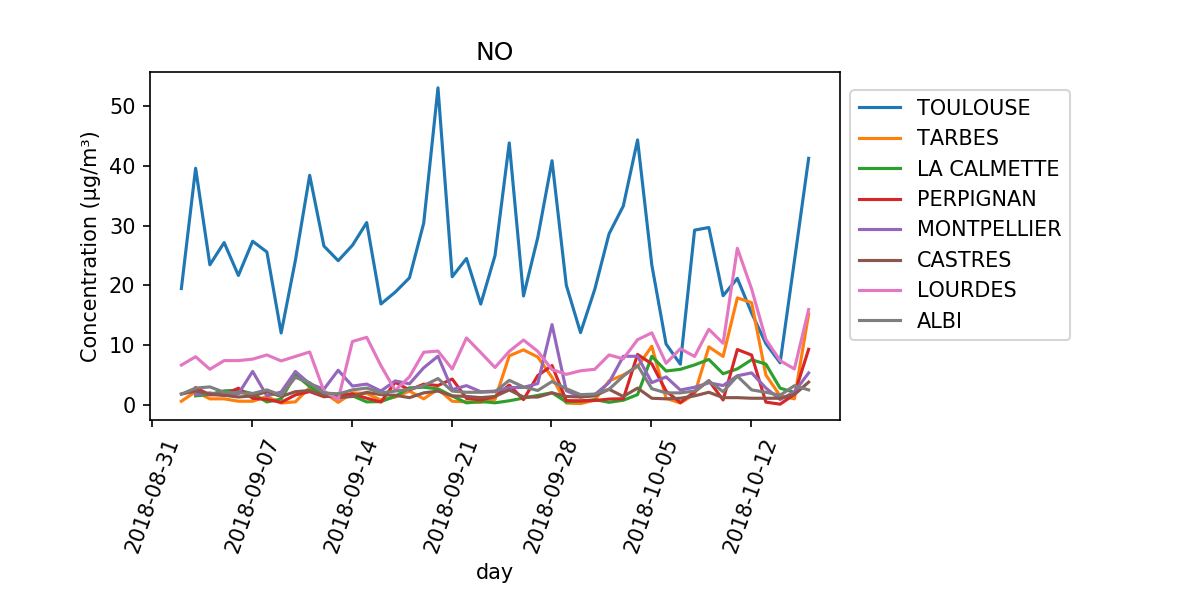

223
TOULOUSE: 24.89
45
TARBES: 3.62
41
LA CALMETTE: 2.69
44
PERPIGNAN: 2.64
82
MONTPELLIER: 3.85
45
CASTRES: 1.67
86
LOURDES: 8.91
45
ALBI: 2.75


<IPython.core.display.Javascript object>


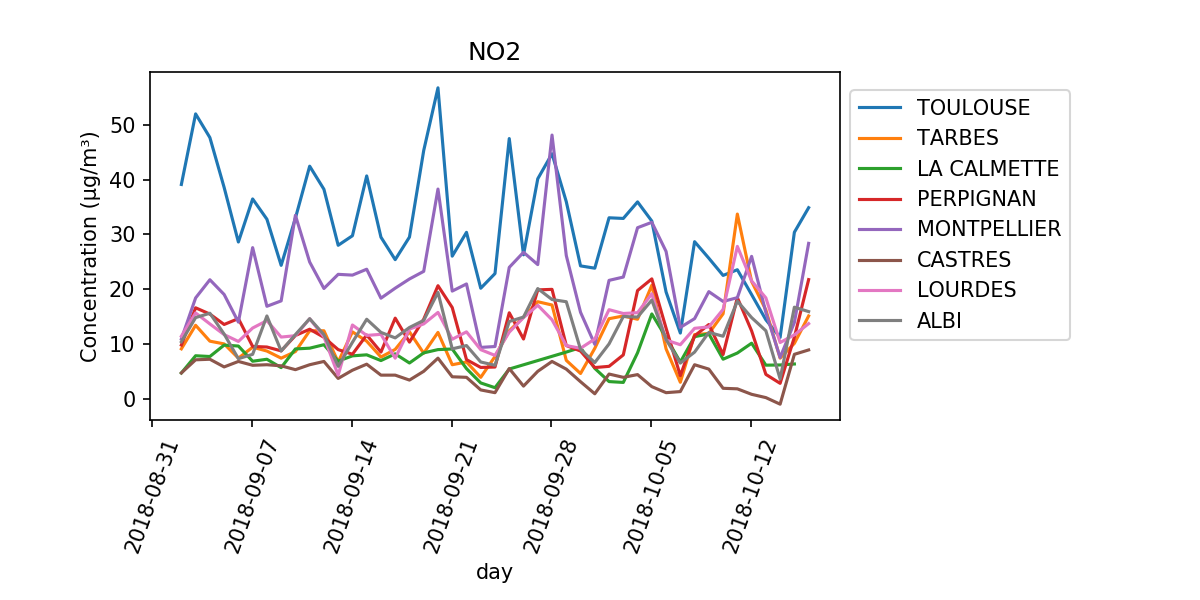

223
TOULOUSE: 31.45
45
TARBES: 11.45
41
LA CALMETTE: 7.63
45
PERPIGNAN: 11.84
83
MONTPELLIER: 21.56
45
CASTRES: 4.38
86
LOURDES: 13.31
45
ALBI: 12.24


In [18]:
# villes = ['TOULOUSE', 'MONTPELLIER']
villes = ['TOULOUSE', 'TARBES',
          'LA CALMETTE', 'PERPIGNAN',
          'MONTPELLIER', 'CASTRES', 'LOURDES', 'ALBI']
polluants = ['O3', 'PM10', 'NO', 'NO2']
for j, polluant in enumerate(polluants):
    polluant_villes_lst = []
    for i, ville in enumerate(villes):
        polluant_ville_df = df_pol_occ.groupby(
            ['polluant', 'nom_com']).get_group((polluant, ville))
        polluant_villes_lst.append(
            polluant_ville_df)

    fig1 = plt.figure(figsize=(8, 4))
    for i, polluant_ville in enumerate(polluant_villes_lst):
        print(polluant_ville.count()[0])
        if polluant_ville.count()[0] > 0:
            ax = sns.lineplot(x='day', y='valeur_originale', ci=None,
                              data=polluant_ville, label=villes[i])
        print(
            villes[i] + ": {0:.2f}".format(polluant_ville['valeur_originale'].mean()))
        plt.title(polluants[j])
        plt.legend(loc='lower left', bbox_to_anchor=(1, 0.2))
        plt.ylabel("Concentration (µg/m³)")
        fig1.subplots_adjust(right=0.7,bottom=0.3) 
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
        my_saving_display(fig1, directory, 'pollution' + polluants[j],
                          imageformat="pdf", saving=True)
#         plt.tight_layout()
    plt.show()

# Question:
Ajouter sur un même graphique et sur la période la plus longue possible, les pollutions de Toulouse, Montpellier, et Paris pour le NO2 et le NO3.
On pourra se servir pour cela du cours pandas.ipynb et des données disponible à l'adresse:
url = "http://josephsalmon.eu/enseignement/datasets/20080421_20160927-PA13_auto.csv"